Построить модель машинного обучения, позволяющую предсказать, является ли цветок цветком класса Ирис-Вирджиния или нет.\
1. Из библиотеки scikit-learn подгрузите данные. Мы уже работали с ними в рамках Темы 1.
2. Сформируйте новое поле target_virginica, которое будет равно из 0, если цветок не является классом 2, иначе  — 1. Убедитесь, что разметка выполнена корректно, рассчитав количество объектов каждого класса по новой целевой переменной target_virginica.
3. Обучите библиотечную модель логистической регрессии на обучающей части данных.
4. Оцените качество обученной на предыдущем шаге модели, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.
5. Сконструируйте свой класс MyLogisticRegression, решающий задачу логистической регрессии методом градиентного спуска.\
Он должен инициализироваться величиной шага градиентного спуска и количеством итераций градиентного спуска.\
Должен содержать метод fit для обучения модели, на вход которой будут подаваться обучающие данные.\
Чтобы реализовать функцию sigmoid, можно воспользоваться библиотечной функцией np.exp.\
Для расчета градиента необходимо использовать формулу, приведенную в курсе в блоке «Логистическая регрессия для решения задачи бинарной классификации».
Должен содержаться метод predict, который будет возвращать лейбл 0/1.\
Лейбл должен рассчитываться из вероятности принадлежности классу 1.\
Вероятность должна рассчитываться как сигмоида от результата произведения матрицы фичей X и вектора весов модели w.
6. Обучите модель с помощью реализованного класса с произвольными параметрами градиентного спуска.
7. Оцените качество модели, обученной с помощью класса MyLogisticRegression, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.
8. Подберите такие параметры градиентного спуска, чтобы разделение получилось не хуже, чем у библиотечной модели.

##### 1. Из библиотеки scikit-learn подгрузите данные.

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = load_iris(as_frame=True).frame

In [3]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.nunique().to_frame(name="unique")

,unique
sepal length (cm),35
sepal width (cm),23
petal length (cm),43
petal width (cm),22
target,3


In [8]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

*Вывод*:\
В датафрейме 150 строк, 5 числовых (int/float) столбцов.\
Данные распределены нормально, выбросов скорее всего нет.\
В данных содержится информация о размерах лепестка и чашелистика \
и принадлежность к одному из трех классов.
Классы сбалансированы.

##### 2. Сформируйте новое поле target_virginica, которое будет равно из 0, если цветок не является классом 2, иначе  — 1.

In [9]:
df['target_virginica'] = df.target.apply(lambda x: 1 if x == 2 else 0)

In [10]:
# проверка новой разметки
df.target_virginica.value_counts()

target_virginica
0    100
1     50
Name: count, dtype: int64

In [11]:
# удаление не нужного признака
del df['target']

##### 3. Обучите библиотечную модель логистической регрессии на обучающей части данных.

In [12]:
# разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["target_virginica"], axis=1), df["target_virginica"], test_size=0.3, random_state=123
)

In [13]:
# проверка распределения классов в выбоках
for y in [y_train, y_test]:
    print(y.value_counts(normalize=True).sort_index())

target_virginica
0    0.685714
1    0.314286
Name: proportion, dtype: float64
target_virginica
0    0.622222
1    0.377778
Name: proportion, dtype: float64


In [14]:
model = LogisticRegression(random_state=1234)
model.fit(X_train, y_train)

LogisticRegression(random_state=1234)

##### 4. Оцените качество обученной на предыдущем шаге модели, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

In [15]:
y_pred = model.predict(X_test)

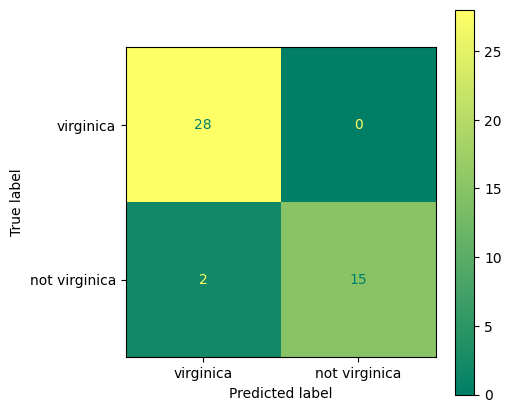

In [16]:
cm=confusion_matrix(y_test, y_pred)#,normalize='true')
cmp = ConfusionMatrixDisplay(cm, display_labels=['virginica','not virginica'])

fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax, cmap = 'summer')
plt.show()

Класс virginica предсказан без ошибок.\
Класс not virginica - 15 значений предсказано точно, 2 значения ошибочно.

##### 5. Сконструируйте свой класс MyLogisticRegression, решающий задачу логистической регрессии методом градиентного спуска.

Формулы для сигмоиды:\
1 / (1 + exp(-z)) \
∇L(y, a) = XT(sigm(Xw)-y) / n

In [17]:
class MyLogisticRegression:
    """
    Класс инициализируется величиной шага и количеством итераций градиентного спуска.
    Метод fit обучает модели, на вход подаваются обучающие данные.
    Метод predict возвращат лейбл 0/1, на вход подаются тестовые.

    Параметры
    ----------
    iterations : int, default=100

    learning_rate : int, default=0.01
    """

    def __init__(self, learning_rate=0.01, iterations=100):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        n = X.shape[0]
        self.weights = np.zeros(X.shape[1])
        self.w0 = 0

        for _ in range(self.iterations):
            y_sigmoid = 1 / (1 + np.exp(-(X @ self.weights + self.w0)))
            # gradient = X.T @ (y_sigmoid - y)
            gradient = 1 / n * X.T @ (y_sigmoid - y)
            w0_distance = 1 / n * np.sum(y_sigmoid - y)
            self.weights -= self.learning_rate * gradient
            self.w0 -= self.learning_rate * w0_distance

    def predict(self, X_test) -> np.array:
        y_sigmoid = 1 / (1 + np.exp(-(X_test @ self.weights + self.w0)))
        classes = np.array([0 if i < 0.5 else 1 for i in y_sigmoid])

        return classes

##### 6. Обучите модель с помощью реализованного класса с произвольными параметрами градиентного спуска.

In [18]:
my_model = MyLogisticRegression(0.05, 200)
my_model.fit(X_train, y_train)
y_pred_my = my_model.predict(X_test)

##### 7. Оцените качество модели, обученной с помощью класса MyLogisticRegression, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

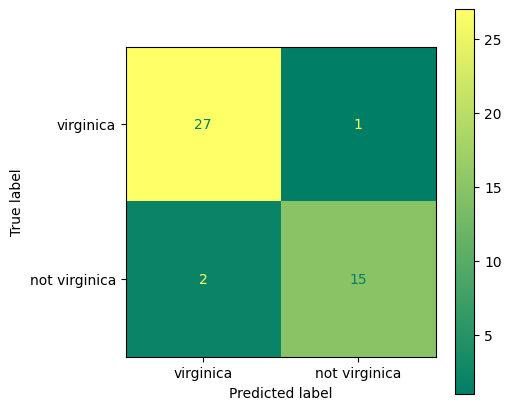

In [19]:
cm=confusion_matrix(y_test, y_pred_my)#,normalize='true')
cmp = ConfusionMatrixDisplay(cm, display_labels=['virginica','not virginica'])

fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax, cmap = 'summer')
plt.show()

Класс virginica - 27 значений предсказано точно, 1 значения ошибочно.\
Класс not virginica - 15 значений предсказано точно, 2 значения ошибочно.

##### 8. Подберите такие параметры градиентного спуска, чтобы разделение получилось не хуже, чем у библиотечной модели.

In [20]:
for iter in range(100, 1001, 200):
    for rate in [0.05, 0.03, 0.01, 0.1, 0.005]:
        my_model = MyLogisticRegression(learning_rate=rate, iterations=iter)
        my_model.fit(X_train, y_train)
        y_pred_my = my_model.predict(X_test)
        score = f1_score(y_test, y_pred_my)
        print(f"score: {round(score, 4)}, rate: {rate}, iter: {iter}")

score: 0.8276, rate: 0.05, iter: 100
score: 0.8276, rate: 0.03, iter: 100
score: 0.0, rate: 0.01, iter: 100
score: 0.9091, rate: 0.1, iter: 100
score: 0.0, rate: 0.005, iter: 100
score: 0.9714, rate: 0.05, iter: 300
score: 0.875, rate: 0.03, iter: 300
score: 0.8276, rate: 0.01, iter: 300
score: 0.9714, rate: 0.1, iter: 300
score: 0.3, rate: 0.005, iter: 300
score: 0.9714, rate: 0.05, iter: 500
score: 0.9714, rate: 0.03, iter: 500
score: 0.8276, rate: 0.01, iter: 500
score: 0.9714, rate: 0.1, iter: 500
score: 0.7857, rate: 0.005, iter: 500
score: 0.9714, rate: 0.05, iter: 700
score: 0.9714, rate: 0.03, iter: 700
score: 0.8387, rate: 0.01, iter: 700
score: 0.9714, rate: 0.1, iter: 700
score: 0.8276, rate: 0.005, iter: 700
score: 0.9714, rate: 0.05, iter: 900
score: 0.9714, rate: 0.03, iter: 900
score: 0.875, rate: 0.01, iter: 900
score: 0.9714, rate: 0.1, iter: 900
score: 0.8276, rate: 0.005, iter: 900


In [21]:
my_model = MyLogisticRegression(learning_rate=0.05, iterations=300)
my_model.fit(X_train, y_train)
y_pred_my = my_model.predict(X_test)

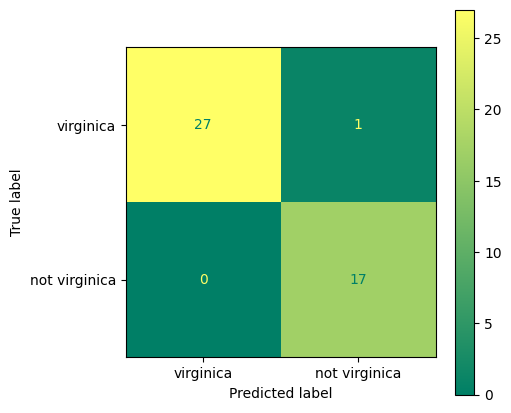

In [22]:
cm=confusion_matrix(y_test, y_pred_my)#,normalize='true')
cmp = ConfusionMatrixDisplay(cm, display_labels=['virginica','not virginica'])

fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax, cmap = 'summer')
plt.show()

Класс virginica - 27 значений предсказано точно, 1 значения ошибочно.\
Класс not virginica - 17 значений предсказано точно.

In [23]:
dct = {
    "buitt-in_model": [
        round(accuracy_score(y_test, y_pred), 4),
        round(precision_score(y_test, y_pred), 4), 
        round(recall_score(y_test, y_pred), 4),
        round(f1_score(y_test, y_pred), 4),
    ],

    "my_model": [
        round(accuracy_score(y_test, y_pred_my), 4), 
        round(precision_score(y_test, y_pred_my), 4), 
        round(recall_score(y_test, y_pred_my), 4),
        round(f1_score(y_test, y_pred_my), 4),
    ]
}

columns = ["Accuracy", "Precision", "Recall", "F1"]

metrics = pd.DataFrame(dct, columns)
metrics

,buitt-in_model,my_model
Accuracy,0.9556,0.9778
Precision,1.0000,0.9444
Recall,0.8824,1.0000
F1,0.9375,0.9714


*Вывод*: \
Собственная модель отработала не хуже, чем встроенная в sklearn (не настроенная).\
Полученные метрики:
- Accuracy	0.9778
- Precision	0.9444
- Recall	1
- F1	0.9714

В работе модели использован шаг градиента 0.05 и 300 итерациий.
